### 1.문제 정의 : 아파트 매매가 예측 하기
- 지도 학습 / 회귀 (연속적인 수치)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [2]:
st = StandardScaler()
minmax = MinMaxScaler() 
rb = RobustScaler()

### 2. 데이터 수집 :  : 아파트 매매가에 영향을 미치는 요인들 조사

In [3]:
apart = pd.read_csv("apart20.csv", encoding="euc-kr")

In [4]:
apart.head()

,시군구,단지명,번지,전용면적(㎡),계약년월,계약일,최고층,층,건축년도,주차수,세대수,현관구조,난방방식,초등학교 도보,200m 이내 버스정류장,200m이내 공원,200m 이내 마트나 편의점,1km 이내 영화관,건설회사,거래금액(만원)
0,광주광역시 광산구 도산동,대덕1,1138.2,59.31,201902,19,10,8,1990,0.5,150,0,1,4,1,1,1,0,대덕건설,8800
1,광주광역시 광산구 도산동,대덕1,1138.2,59.31,201904,4,10,10,1990,0.5,150,0,1,4,1,1,1,0,대덕건설,8000
2,광주광역시 광산구 도산동,대덕1,1138.2,59.31,201904,6,10,8,1990,0.5,150,0,1,4,1,1,1,0,대덕건설,8550
3,광주광역시 광산구 도산동,대덕1,1138.2,39.15,201905,5,10,2,1990,0.5,150,0,1,4,1,1,1,0,대덕건설,5850
4,광주광역시 광산구 도산동,대덕1,1138.2,31.59,201906,7,10,10,1990,0.5,150,0,1,4,1,1,1,0,대덕건설,5500


In [5]:
apart.drop(["단지명"], axis=1, inplace=True)

In [6]:
apart.shape

(23877, 19)

### 3. 데이터 전처리(One-Hot-Encoding)

In [7]:
X = apart.iloc[:,:18]
y = apart.iloc[:,18]

In [8]:
X_o = pd.get_dummies(X)

In [9]:
X_o.shape

(23877, 152)

In [11]:
st.fit(X_o)
#minmax.fit(X_o)
#rb.fit(X_o)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
st.transform(X_o)
#minmax.transform(X_o)
#rb.transform(X_o)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.70108631, -0.61058724,  1.72831162, ..., -0.31809631,
        -0.1013992 , -0.02507219],
       [ 0.70108631, -0.61058724,  1.74850701, ..., -0.31809631,
        -0.1013992 , -0.02507219],
       [ 0.70108631, -0.61058724,  1.74850701, ..., -0.31809631,
        -0.1013992 , -0.02507219],
       ...,
       [-1.13970749,  0.59327722, -1.22021533, ..., -0.31809631,
        -0.1013992 , -0.02507219],
       [-1.13970749,  0.59327722, -1.21011763, ..., -0.31809631,
        -0.1013992 , -0.02507219],
       [-1.13970749,  0.59327722, -1.21011763, ..., -0.31809631,
        -0.1013992 , -0.02507219]])

In [13]:
X_o

,번지,전용면적(㎡),계약년월,계약일,최고층,층,건축년도,주차수,세대수,현관구조,...,건설회사_한성건설,건설회사_한양,건설회사_한울종합건설,건설회사_해광건설,"건설회사_현대건설,브이종합건설,유진건설",건설회사_현진,건설회사_혜림건설,건설회사_호반건설,건설회사_호반산업개발,건설회사_호반청암건설
0,1138.2,59.3100,201902,19,10,8,1990,0.50,150,0,...,0,0,0,0,0,0,0,0,0,0
1,1138.2,59.3100,201904,4,10,10,1990,0.50,150,0,...,0,0,0,0,0,0,0,0,0,0
2,1138.2,59.3100,201904,6,10,8,1990,0.50,150,0,...,0,0,0,0,0,0,0,0,0,0
3,1138.2,39.1500,201905,5,10,2,1990,0.50,150,0,...,0,0,0,0,0,0,0,0,0,0
4,1138.2,31.5900,201906,7,10,10,1990,0.50,150,0,...,0,0,0,0,0,0,0,0,0,0
5,1138.2,59.3100,201801,8,10,3,1990,0.50,150,0,...,0,0,0,0,0,0,0,0,0,0
6,1138.2,59.3100,201802,5,10,5,1990,0.50,150,0,...,0,0,0,0,0,0,0,0,0,0
7,1138.2,39.1500,201805,31,10,5,1990,0.50,150,0,...,0,0,0,0,0,0,0,0,0,0
8,1138.2,39.1500,201806,7,10,9,1990,0.50,150,0,...,0,0,0,0,0,0,0,0,0,0
9,1138.2,39.1500,201807,9,10,1,1990,0.50,150,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_o.shape

(23877, 152)

### 4. 시각화

In [15]:
import matplotlib.pyplot as plt 

In [18]:
%matplotlib inline

In [19]:
import matplotlib

In [20]:
import matplotlib.font_manager as fm

In [21]:
fm.get_fontconfig_fonts()

[]

In [22]:
font_location = 'C:/Windows/Fonts/NanumGothic.ttf'

In [25]:
%matplotlib inline

In [26]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

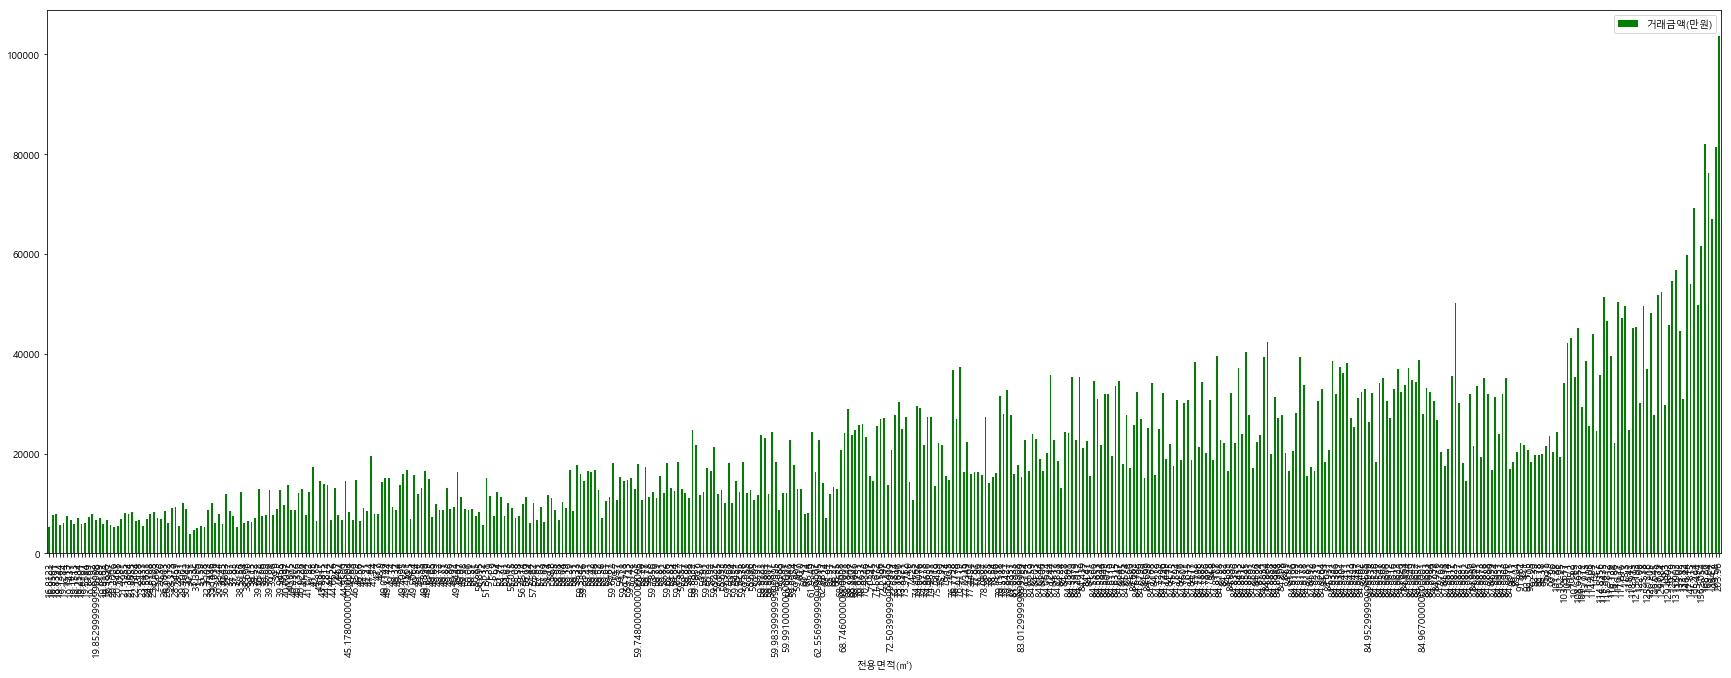

In [69]:
apart.groupby('전용면적(㎡)').mean()[['거래금액(만원)']].plot(kind='bar', figsize=(30,10), 
                                                           stacked=True, color=['g', 'r']);

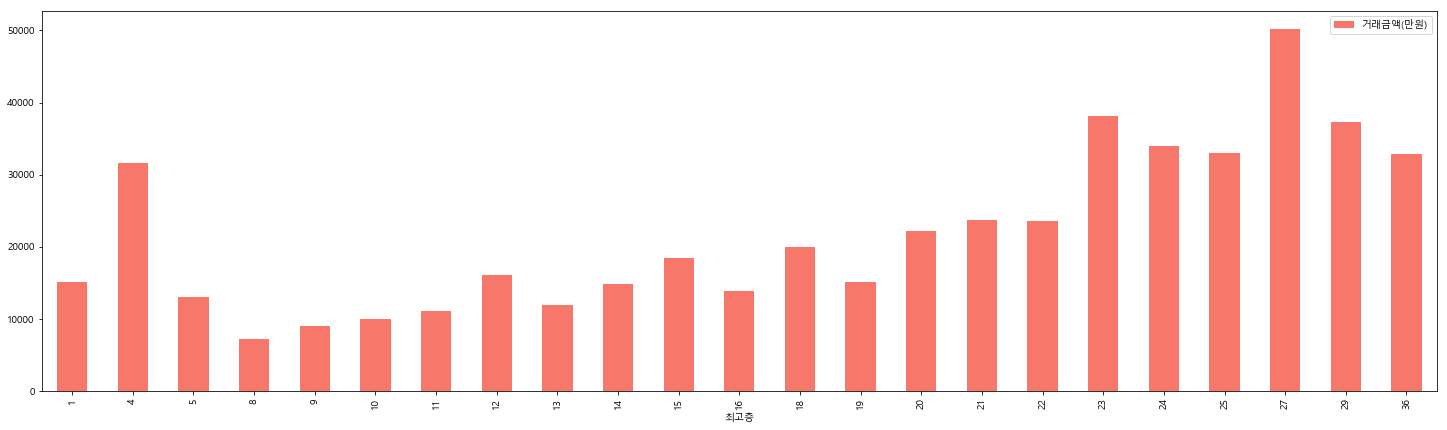

In [124]:
apart.groupby('최고층').mean()[['거래금액(만원)']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['#F7786B']);

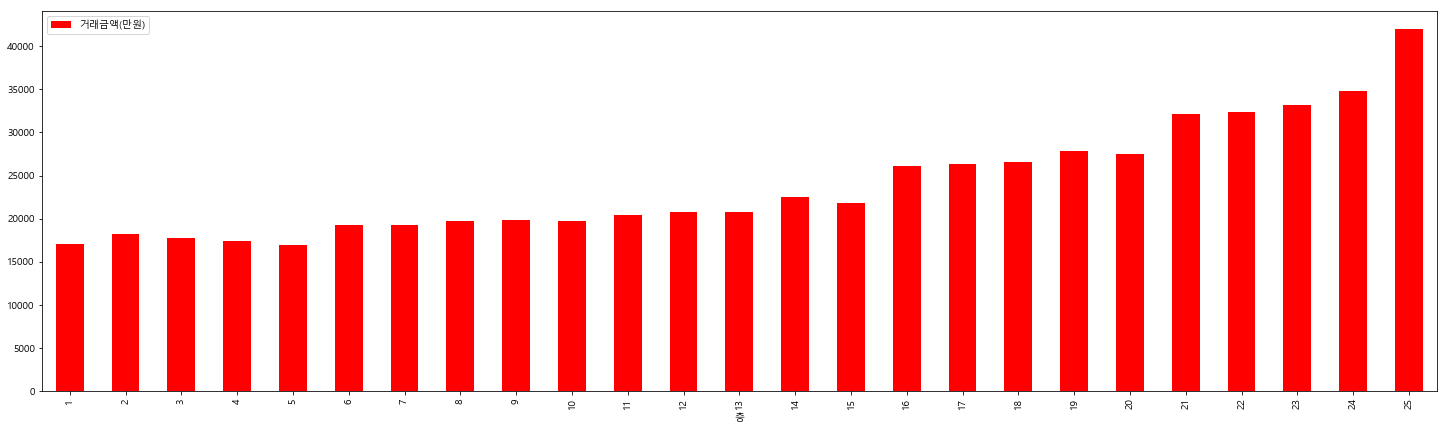

In [127]:
apart.groupby('층').mean()[['거래금액(만원)']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['r']);

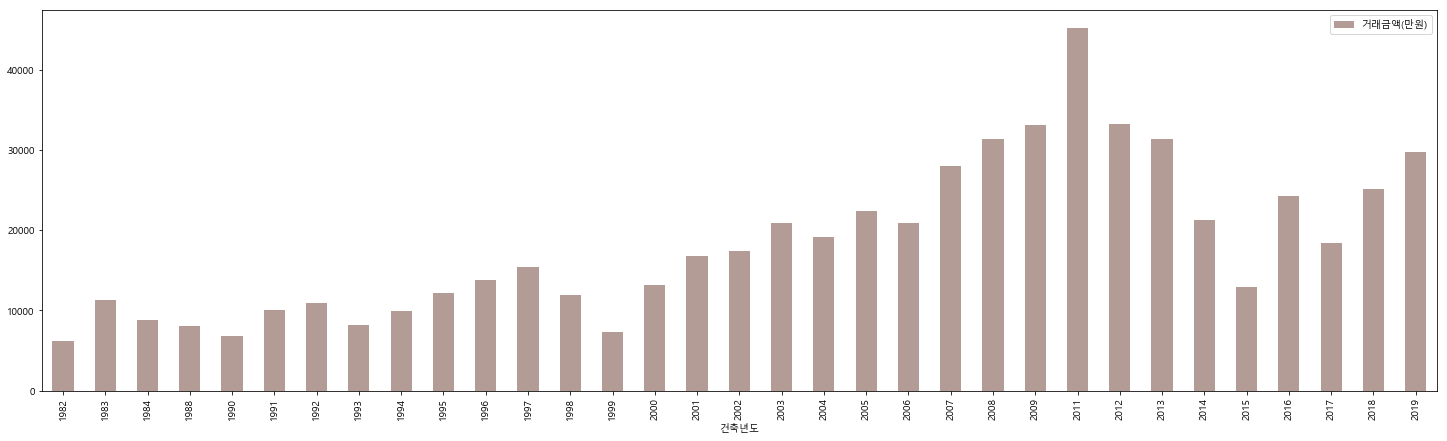

In [129]:
apart.groupby('건축년도').mean()[['거래금액(만원)']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['#B39B96']);

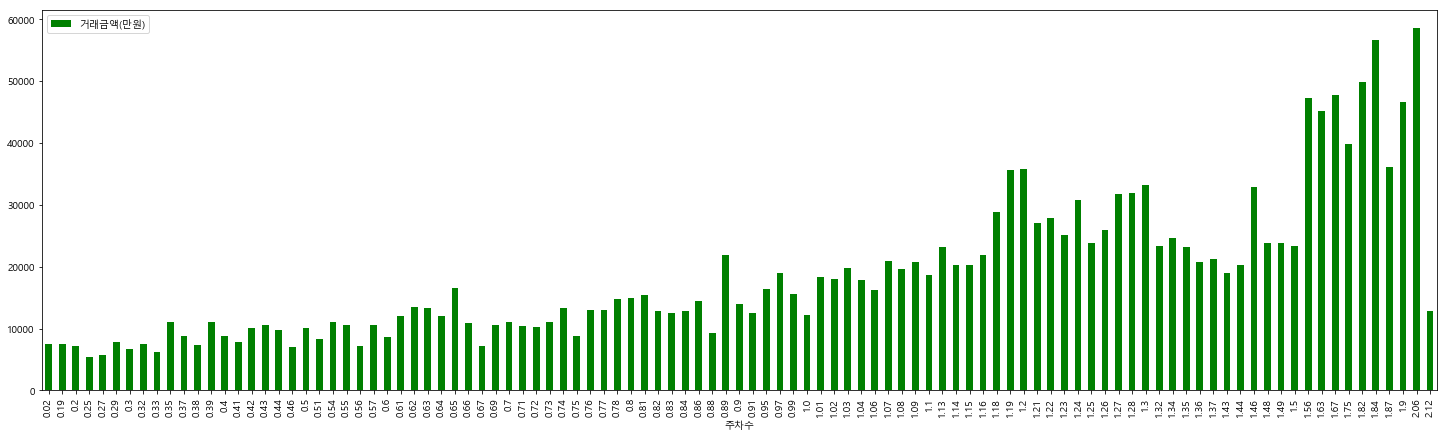

In [74]:
apart.groupby('주차수').mean()[['거래금액(만원)']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['g',]);

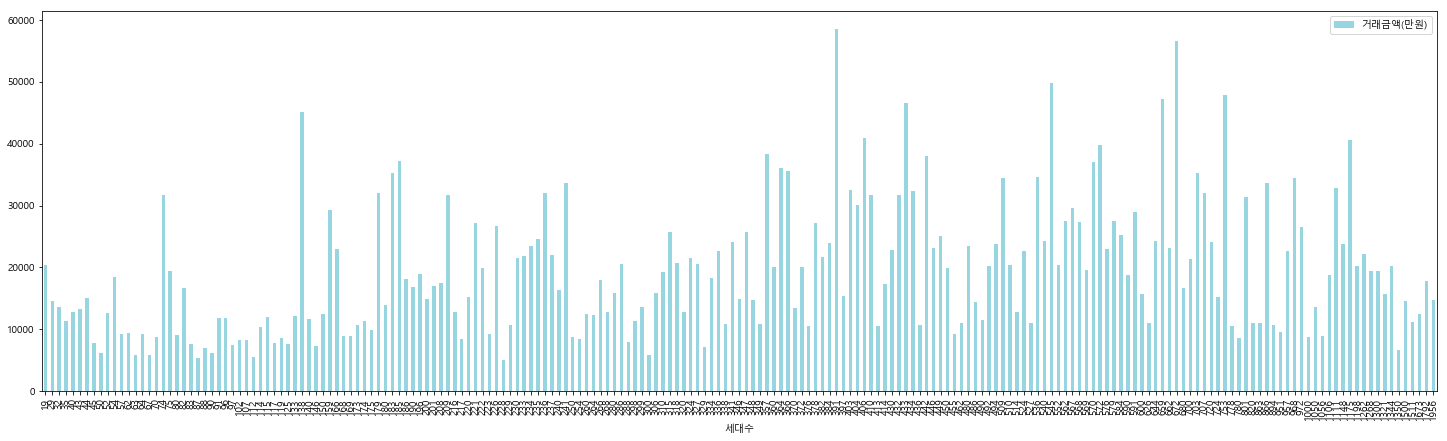

In [123]:
apart.groupby('세대수').mean()[['거래금액(만원)']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['#97D5E0']);

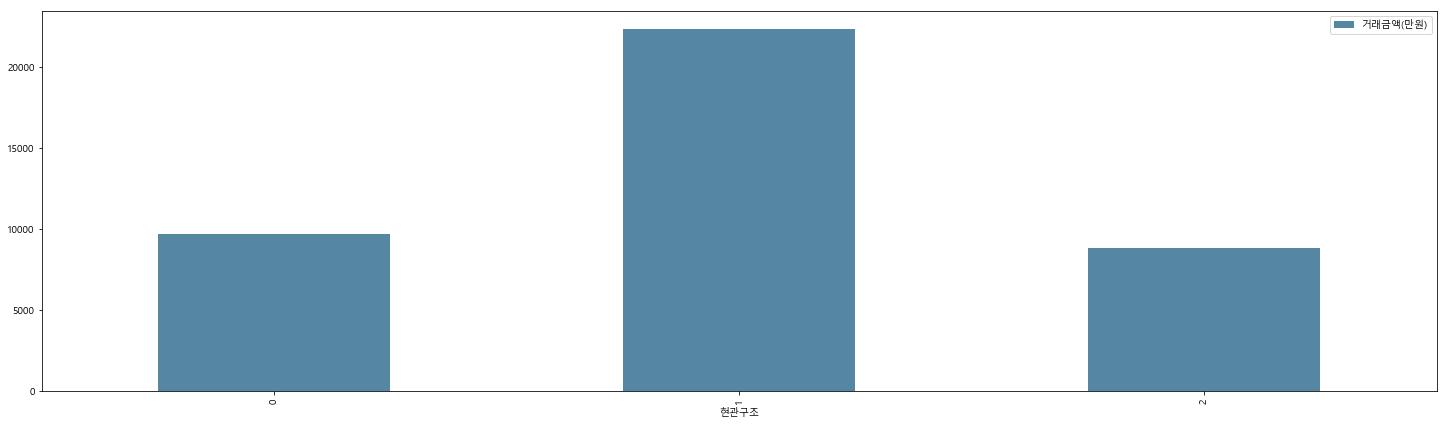

In [115]:
apart.groupby('현관구조').mean()[['거래금액(만원)']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['#5587A2']);

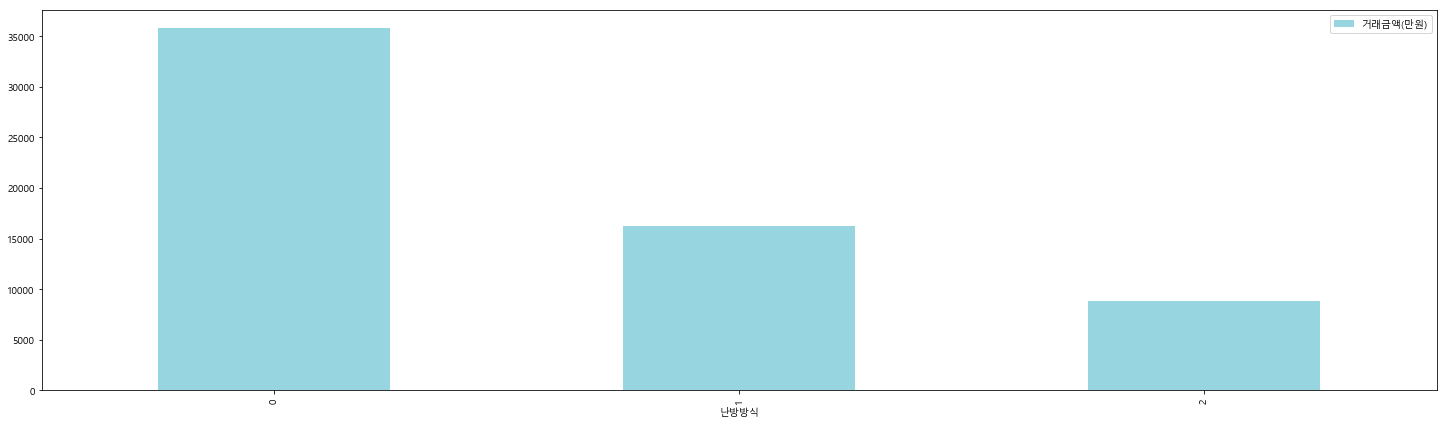

In [122]:
apart.groupby('난방방식').mean()[['거래금액(만원)']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['#97D5E0']);

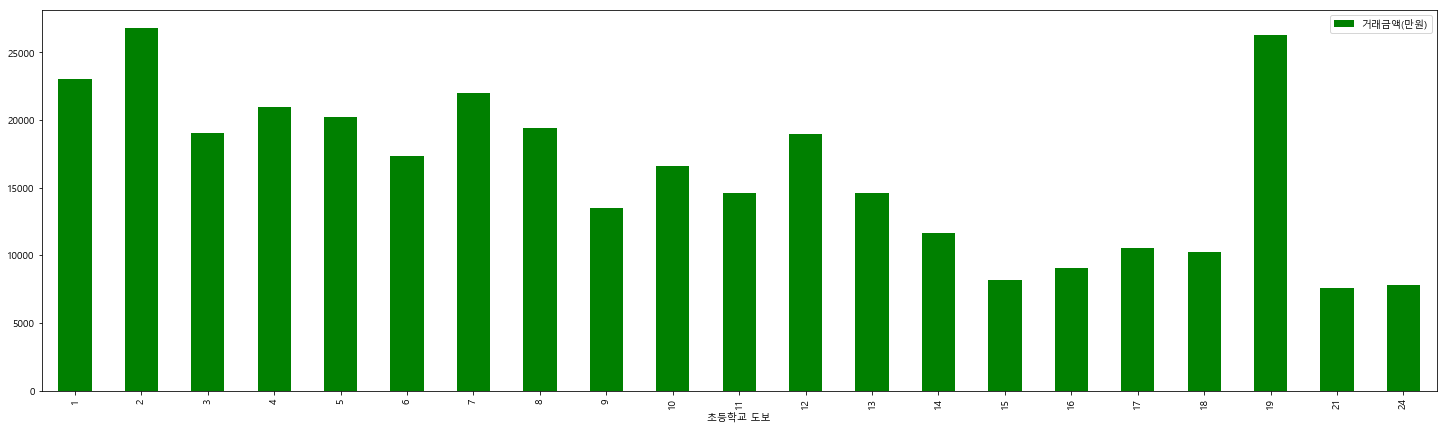

In [47]:
apart.groupby('초등학교 도보').mean()[['거래금액(만원)']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['g', 'r']);

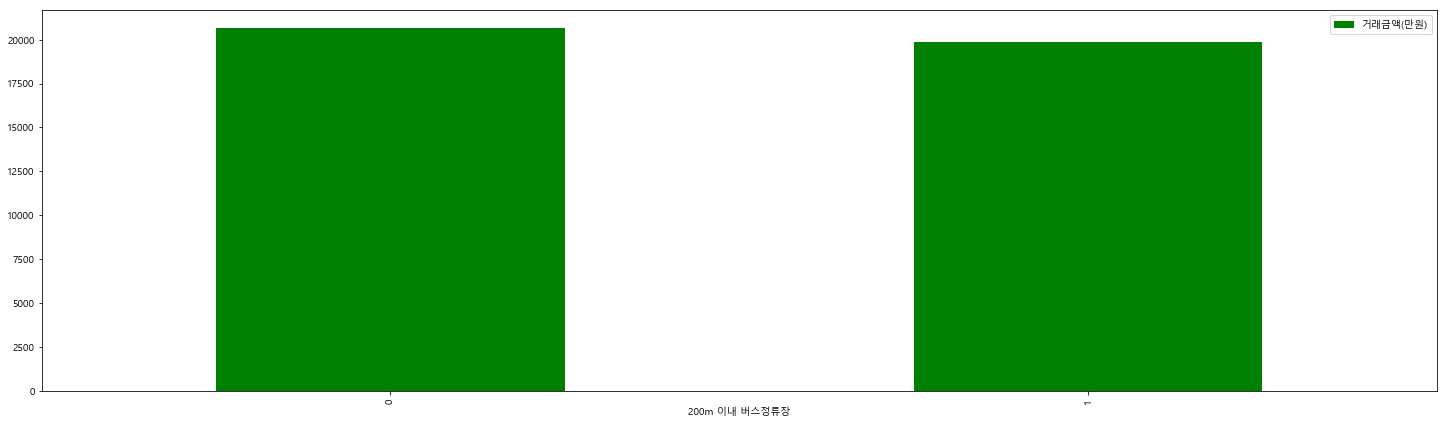

In [56]:
apart.groupby('200m 이내 버스정류장').mean()[['거래금액(만원)']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['g', 'r']);

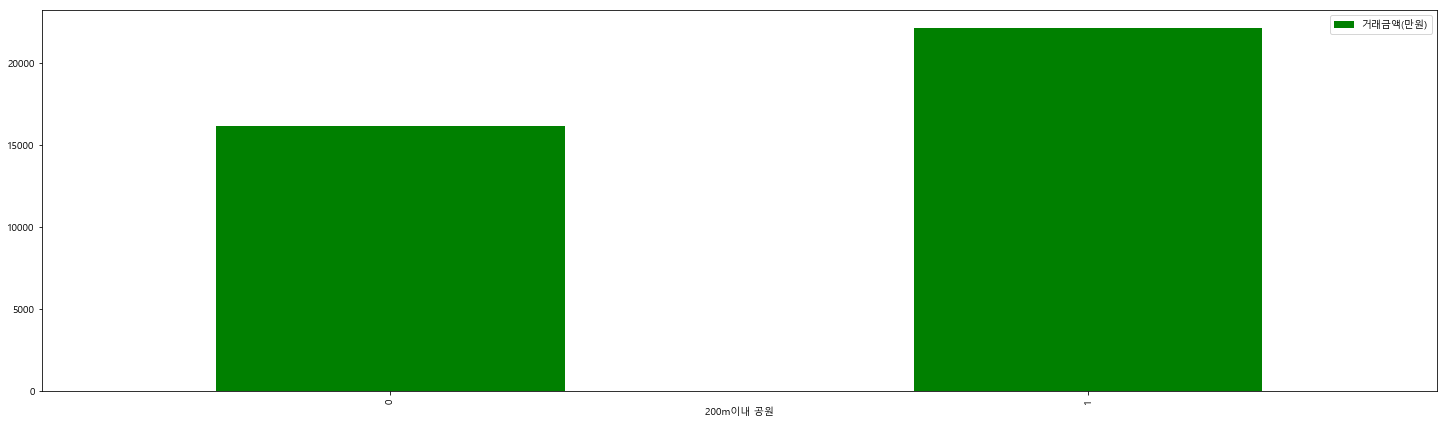

In [52]:
apart.groupby('200m이내 공원').mean()[['거래금액(만원)']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['g', 'r']);

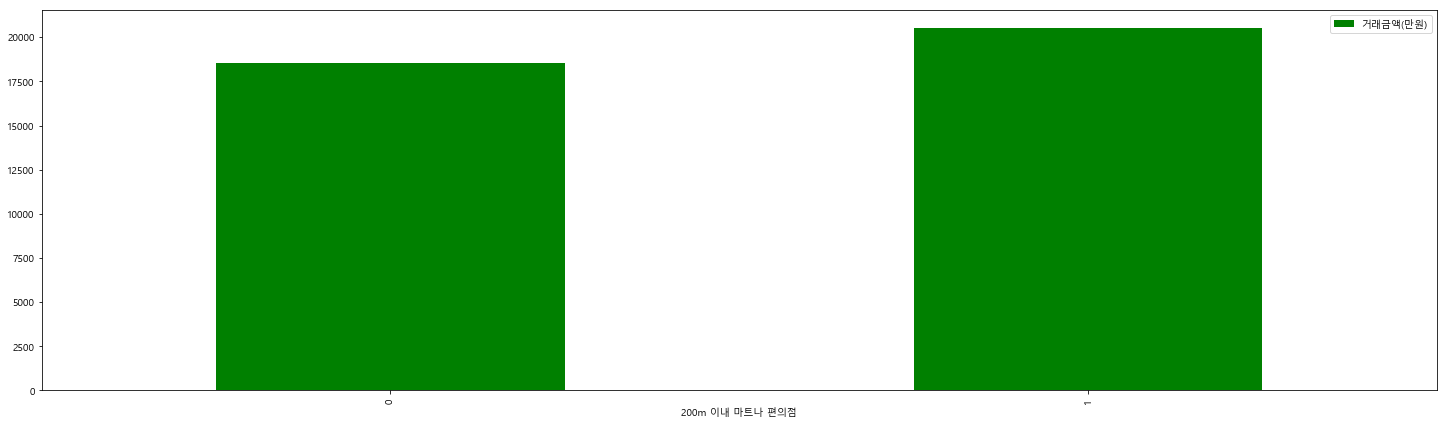

In [63]:
apart.groupby('200m 이내 마트나 편의점').mean()[['거래금액(만원)']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['g', 'r']);

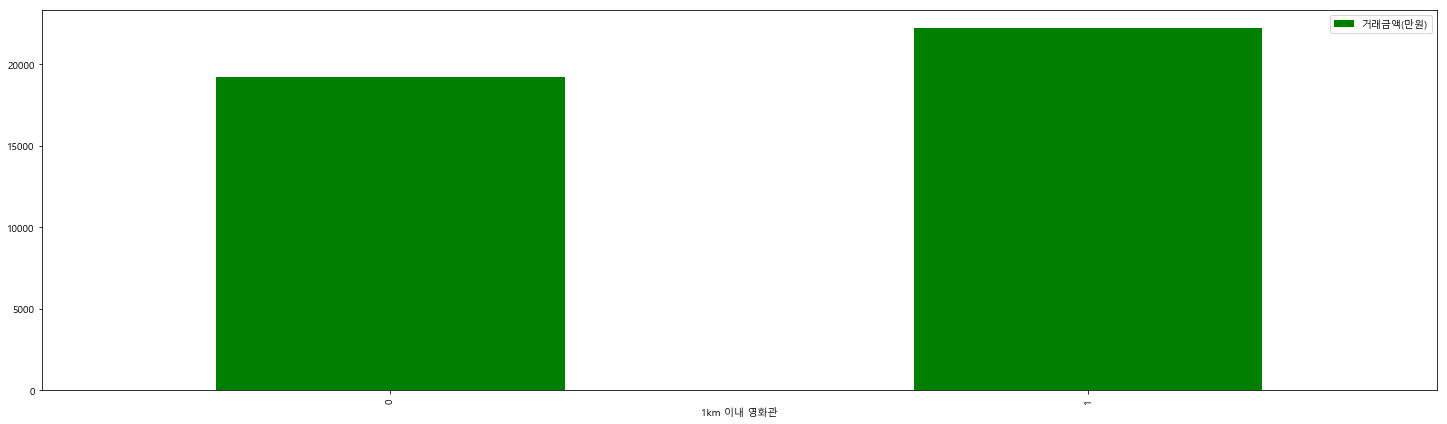

In [58]:
apart.groupby('1km 이내 영화관').mean()[['거래금액(만원)']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['g', 'r']);

###  5. 모델링 학습하기

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_o,y,test_size=0.4,random_state = 2)

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14326, 152)
(9551, 152)
(14326,)
(9551,)


### LinearRegression Model

In [93]:
from sklearn.linear_model import LinearRegression
lg_model = LinearRegression()
lg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
print("train score : ",lg_model.score(X_train,y_train))
print("test score : ", lg_model.score(X_test, y_test))

train score :  0.9333140966173478
test score :  0.9307304879294024


# Ensemble
- RandomForestRegressor Model 

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [96]:
print("train score : ",rf_model.score(X_train,y_train))
print("test score : ", rf_model.score(X_test, y_test))

train score :  0.9967408589894445
test score :  0.9815888173176918


- GradientBoosting

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

### 예측 한 값을 결과랑 비교 오차율 계산

In [98]:
import numpy as np
from sklearn import metrics 

In [99]:
y_pre = rf_model.predict(X_test)

In [100]:
mse = metrics.mean_squared_error(y_test,y_pre) ## 실제값과 예측값을 넣어주면 mse 값을 구해준다.
mse

2154634.0933879702

In [101]:
rmse = np.sqrt(mse) ### 루트를 씌울때 쓴다.
rmse   ## 실제로 나의 데이터가 오차가 얼마나 나는지 나타내준다. 실제 평균오차를 뜻한다.

1467.8671920129457

## TEST

In [102]:
import numpy as np
from sklearn import metrics

In [103]:
apart_test = pd.read_csv("test_onehot.csv",encoding="euc-kr")
apart_test.shape

(200, 152)

In [104]:
for i in apart_test.columns:
    if i not in X_o.columns:
        print(i)

In [105]:
print(X_o.shape)
print(apart_test.shape)

(23877, 152)
(200, 152)


In [106]:
sub = pd.read_csv('submission.csv',encoding = 'euc-kr')

In [107]:
pre = rf_model.predict(apart_test)

In [108]:
pre1=pd.DataFrame(pre)

In [109]:
pre1.to_csv("pre.csv",encoding="euc-kr")

In [110]:
mse = metrics.mean_squared_error(sub,pre) ## 실제값과 예측값을 넣어주면 mse 값을 구해준다.
mse

ValueError: could not convert string to float: '5,750'

In [111]:
rmse = np.sqrt(mse) ### 루트를 씌울때 쓴다.
rmse   ## 실제로 나의 데이터가 오차가 얼마나 나는지 나타내준다. 실제 평균오차를 뜻한다.

1467.8671920129457